<a href="https://colab.research.google.com/github/affanbinusman/Image-Compression/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Affan Bin Usman

import numpy as np 
import scipy.io 
import matplotlib.pyplot as plt 

Functions

In [ ]:
# Calculating the compression ratio by the formula given in module 6

def compression_ratio(rank):
  global row
  global col
  return(round(100* ((rank*(1 + row + col)) / (row * col)),2))

In [ ]:
# Building an image using rank approximation

def approx_image(rank):
  global U
  global Sig
  global V

  return (U[:,:rank] @ np.diag(Sig[:rank]) @ V[:rank,:])

# **Task 1**

Load the image contained in "data.mat", then display it.

In [ ]:
# Importing .dat file

image_data = scipy.io.loadmat('data.mat')
image = image_data['image']

In [ ]:
# Finding rows and columns of image matrix

row = len(image)
col = len(image[0])

Text(0.5, 1.0, 'Original Image')

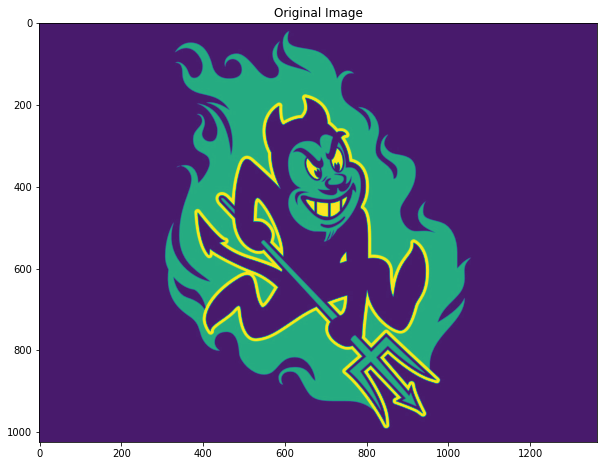

In [ ]:
# Showing original image

plt.figure(figsize = (10,10))
plt.imshow(image)
plt.title("Original Image")

# **Task 2**

Perform an SVD on the image. Then, make a semilog plot with log scaling in the y-axis of the normalized singular values sigma r/sigma 1, versus the rank r.

In [ ]:
# Performing SVD on image

U, Sig, V = np.linalg.svd(image)
norm_sig_values = (1/Sig[0])*Sig            # Normalized singular values
rank_ofsig = list(range(1, len(Sig)+1))     # Creating a list of ranks

Text(0, 0.5, 'Normalized Singular Values (log scale)')

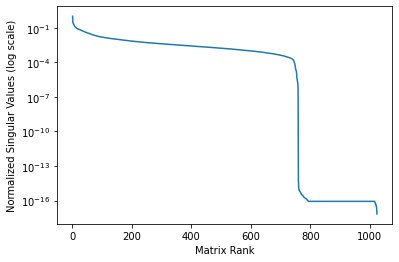

In [ ]:
# Plotting normalized singular values on y-axis and rank on x-axis

plt.semilogy(rank_ofsig, norm_sig_values)
plt.xlabel("Matrix Rank")
plt.ylabel("Normalized Singular Values (log scale)")

# **Task 3**

At what rank ro do we get sigma r/sigma 1, = 0.01? What is the compression ratio for a rank-r0 approximation?

In [ ]:
# Since 0.01 does not exist in the normalized singular value list, we find value closest to 0.01

for i in range(0, len(norm_sig_values)):
  if norm_sig_values[i] >= 0.01:
    r_0 = i+1

print("At rank#", r_0, "we get the first 0.01")

At rank# 148 we get the first 0.01


In [ ]:
print("Compression ratio for rank", r_0, "approximation is:", compression_ratio(r_0),"%")

Compression ratio for rank 148 approximation is: 25.31 %


# **Task 4**

Build and display rank-2, rank-10, rank-50, rank-100 and rank-r0, approximations of the original image. Give the compression ratio for each of these approximations and comment on their visual quality.

In [ ]:
# List of ranks

ranks = [2, 10, 50, 100, r_0]

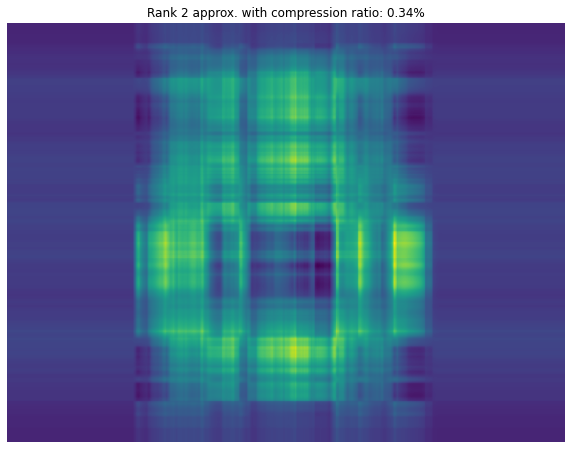

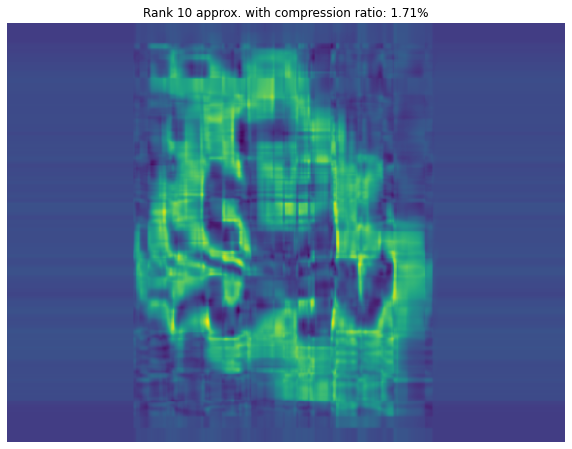

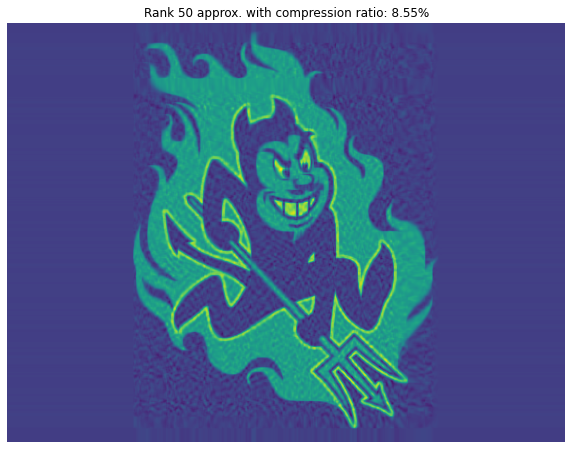

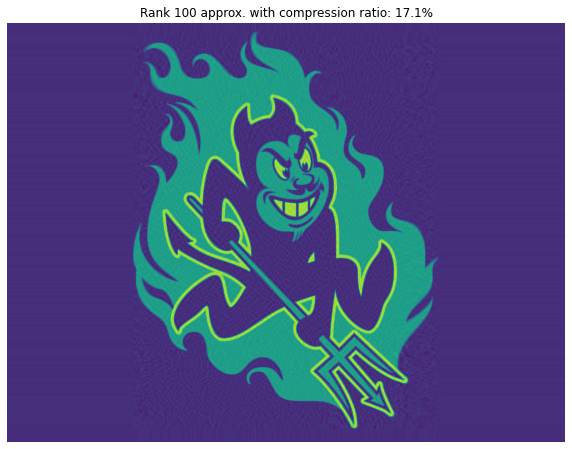

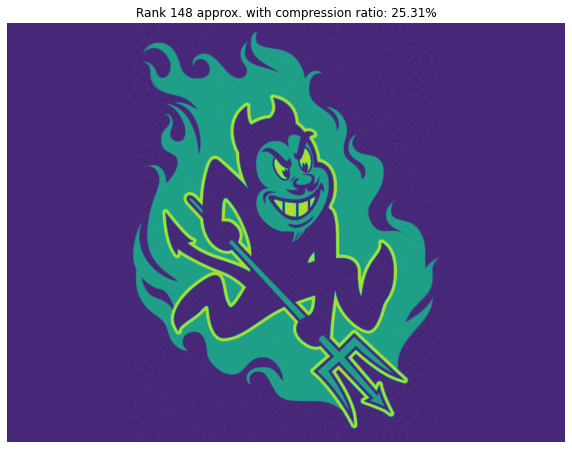

In [ ]:
# Printing approximatations of original image and finding compression ratio

for i in range(0, len(ranks)):
  c_r = compression_ratio(ranks[i])
  img = approx_image(ranks[i])
  plt.figure(figsize = (10,10))
  plt.axis("off")
  plt.imshow(img)
  plt.title("Rank " + str(ranks[i]) + " approx. with compression ratio: "+ str(c_r)+"%")

**Note:** Please see report for comments on visal quality of images. 